# Wireless Project

Practical Lab:

>       Robin Gerzaguet
> 
>   ENSSAT - Université de Rennes 1
> 
>   robin.gerzaguet@enssat.fr
> 
>   6 Rue de Kerampont - CS 80518 22305 LANNION - France

## Chapter 2 

***Wireless Lab***

The project will be done under Julia. Most of the functions will have to be coded and some functions will be provided. The transmitter and receiver description are described in the previous chapter. When necessary, the reader should have an deep look to the appropriate parts.

We emulate in this section a small network where the base station provided a broadband service to several users. Each group of student is associated to a device (i.e a mobile terminal) and has a unique identifier. This identifier will be used to extract the dedicated payload content from the multiplexed stream. The ultimate purpose is to decode the sent text and discover the secret key that has been hide for each user in the frame. In the proposed lab, we will focus on the L2 part: we will suppose that we will have a time frequency grid from the low layer (L1) and that this matrix has been obtained from an over the air transmission. The purpose is to recover the payload associated to your group identifier and discover the secret key hidden in the payload content.
    
To do so, we will have to decode all the channels that are multiplexed in the received LTE frame. Each channel has a specific information that will be used to sequentially obtained all the necessary flags and parameters for the final payload decoding.We will first have to built the necessary functions to recover all the parameters, and then apply the successive decoding functions.

---
<span style="color:orange">***Code Warning***</span>.

The LTE channels are not static, their size and their parameters evolve by time (associated to network load and link quality). So your code should be !
- Clean your code and use functions when needed
- Always use variables and parameters: nothing should be hard-coded
- Use structures or classes to have a clean nested code, especially for function calls.

---

#### 2.1 Extraction of the time frequency matrix

---

1. Load the Matlab datafile that embed the ideal time frequency matrix. This time frequency is a matrix of complex symbols that bears all the channels for all the different users. The matrix load can be done with the following command

In [1]:
# % −−− Loading the ideal channel
include("data/julia/tfMatrix.jl");

In [2]:
# % −−− Getting allocated subcarriers
yₜᵩ = tfMatrix; # Let's call the tfMatrix (time frequency matrix) y\_t\_phi

- What is the size of the matrix ? Why such dimensions ?
- We need to recover only the usefull part, as some of the subcarriers is not allocated in OFDM. From the subcarrier mapping described in Section 1.1.2, obtain the submatrix with only the allocated subcarriers. Explain what are the new dimension of this matrix.

In [3]:
yₜᵩ[1:10]; @show typeof(yₜᵩ), size(yₜᵩ);

(typeof(yₜᵩ), size(yₜᵩ)) = (Matrix{ComplexF64}, (1024, 14))


- Have a look on the matrix power distribution. This can be done with the use of contourf Matlab function. Use the following code and complete the missing parts related to the Figure informations.

In [4]:
using Plots

In [5]:
ȳₜᵩ = abs.(yₜᵩ)

# Define the number of levels
num_levels = 8
min_val = minimum(ȳₜᵩ)
max_val = maximum(ȳₜᵩ)
levels = range(min_val, stop=max_val, length=num_levels)
colors = cgrad([:black, :blue, :green, :orange, :yellow], [0.01, 0.1, 0.25, 0.5, 0.75, 1]);

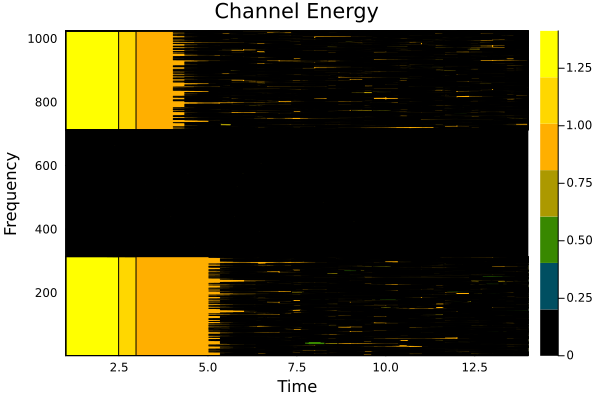

In [6]:
# % −−− Plotting channel energy
contourf(ȳₜᵩ
    , xlabel = "Time", ylabel = "Frequency"
    , title = "Channel Energy"
    , levels=collect(levels)
    , seriescolor = colors
)

Remark the 4 main area. The yellow and orange corresponds to the synchronisation channels, the (salmon) ___green___ to the control channels and the black area corresponds to the payload content.

- [ ] [Julia Colorschemes](https://docs.juliaplots.org/latest/generated/colorschemes/)

The synchronisation channels (see Section 1.3.1) are used for synchronisation and also for channel estimation. They will be not be used in the first part of the lab, and can be (for the moment) dropped. As stated in the norm description, they occupy the two first OFDM symbols. Create the shorter matrix with the useful channels (namely the PBCH, PDCCH and PDSCH) with the following command

In [8]:
# % −−− Removing PSCH and SSCH channels 2 
y₉ₐₘ = yₜᵩ[:,3:end];

Now, we need to decode the first channel that bears information: the PBCH.

---
<span style="color:blue">***Conclusion***</span>


At this stage, you should have the following elements
- A working Matlab/ Octave session
- 3 defined Matrix with different size, that corresponds to the symbol information

---

### 2.2 PBCH decoding

Carefully read the section related to the PBCH description in Section 1.3.2. As stated in this section, the PBCH has a fixded format: the symbol are BPSK and the FEC used is a Hamming748


